## Crosswalks in the City of LA

This data set provides the location of all the crosswalks in the City of Los Angeles. The dataset includes both controlled and uncontrolled crosswalks. Controlled crosswalks can be far less safe for pedestrians. The map of the uncontrolled sidewalks at the end of this file shows a picture of where these less-safe crosswalks exist geographically in LA, and thus points to where it is potentially less safe to be a pedestrian.

Source: <a href="https://geohub.lacity.org/datasets/d1c62ae5020741b9b1cd4de0619e7ff0/explore?location=34.019629%2C-118.406230%2C10.96">City of Los Angeles GeoHub Crosswalks Dataset</a>


In [35]:
import pandas as pd
import geopandas as gpd

Imported geojson file of all the crosswalks in LA

In [36]:
crosswalks = gpd.read_file('Crosswalks.geojson')

Printed the first 5 rows of data so see all the columns in the dataset

In [37]:
crosswalks.head()

,ID,ObjectID,Source,Date_,Control,Location,Color,Ladder,Primary_St,Cross_Stre,CrossType,CrosswalkColorCodeDesc,ControlTypeDesc,MarkingTypeDesc,TOOLTIP,NLA_URL,geometry
0,1,1,None,2005-11-01 00:00:00+00:00,1,318,0,None,WOODMAN AV,LASSEN ST,White Controlled Crosswalk,White,Signal,Continental,Crosswalk Color: White\nControl Type: Signal\n...,navigatela/reports/dot_crosswalks_report.cfm?pk=1,POINT (-118.45063 34.25071)
1,2,2,None,2005-11-01 00:00:00+00:00,1,228,0,None,LASSEN ST,WOODMAN AV,White Controlled Crosswalk,White,Signal,Continental,Crosswalk Color: White\nControl Type: Signal\n...,navigatela/reports/dot_crosswalks_report.cfm?pk=2,POINT (-118.45068 34.25054)
2,3,3,None,2005-11-01 00:00:00+00:00,1,138,0,None,WOODMAN AV,LASSEN ST,White Controlled Crosswalk,White,Signal,Continental,Crosswalk Color: White\nControl Type: Signal\n...,navigatela/reports/dot_crosswalks_report.cfm?pk=3,POINT (-118.45048 34.25051)
3,4,4,None,2005-11-01 00:00:00+00:00,1,48,0,None,FILMORE ST,WOODMAN AV,White Controlled Crosswalk,White,Signal,Continental,Crosswalk Color: White\nControl Type: Signal\n...,navigatela/reports/dot_crosswalks_report.cfm?pk=4,POINT (-118.45041 34.25071)
4,5,5,None,2005-11-01 00:00:00+00:00,1,270,0,None,DEVONSHIRE ST,SEPULVEDA BL,White Controlled Crosswalk,White,Signal,Continental,Crosswalk Color: White\nControl Type: Signal\n...,navigatela/reports/dot_crosswalks_report.cfm?pk=5,POINT (-118.46763 34.25730)


Output above shows the first 5 rows of data in the crosswalks dataset

Next, counted the number of rows and columns in the dataset

In [38]:
crosswalks.shape

(21475, 17)

Output above shows the number of rows and columns in the crosswalks dataset

Next, examined the dataset information

In [39]:
crosswalks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21475 entries, 0 to 21474
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   ID                      21475 non-null  int64              
 1   ObjectID                21475 non-null  int64              
 2   Source                  0 non-null      object             
 3   Date_                   18759 non-null  datetime64[ns, UTC]
 4   Control                 21475 non-null  int64              
 5   Location                21475 non-null  int64              
 6   Color                   21475 non-null  int64              
 7   Ladder                  0 non-null      object             
 8   Primary_St              21475 non-null  object             
 9   Cross_Stre              21475 non-null  object             
 10  CrossType               21475 non-null  object             
 11  CrosswalkColorCodeDesc  21475 non

Output above shows the columns, data types, and number of null values within each column. 

Next, counted how many crosswalks and white and how many are yellow and how many are controlled versus uncontrolled 

In [40]:
crosswalks['CrossType'].value_counts()

White Controlled Crosswalk                 15217
Yellow Controlled Crosswalk                 5645
White Uncontrolled Pedestrian Crosswalk      485
Yellow Uncontrolled Crosswalk                128
Name: CrossType, dtype: int64

Output above shows how many crosswalks fall into each cross walk type category

Next, plotted where the white and yellow uncontrolled and controlled sidewalks are


<AxesSubplot: >

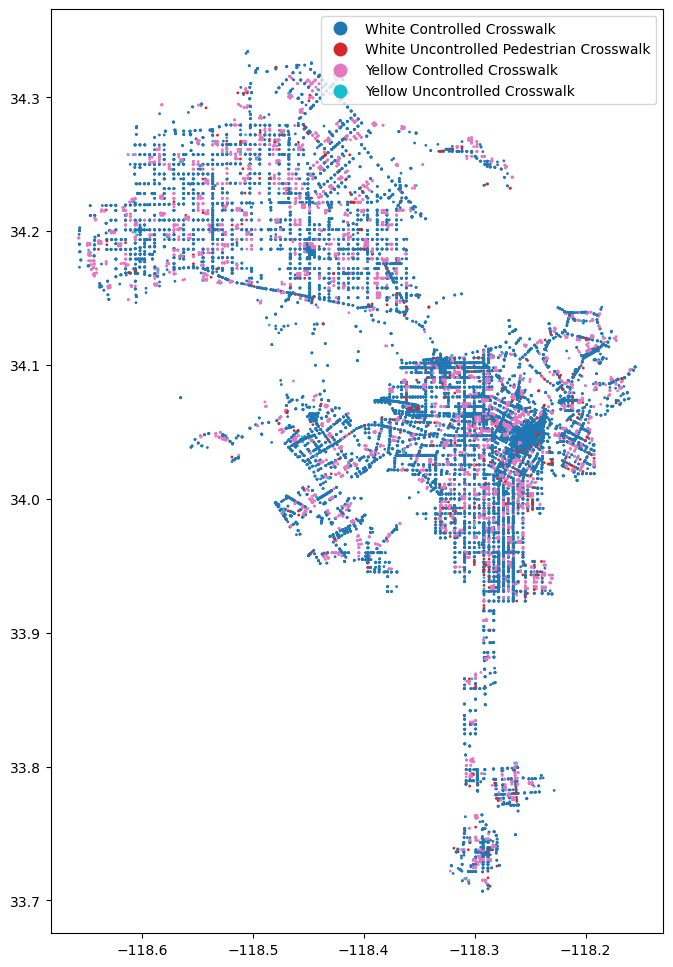

In [41]:
crosswalks.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'CrossType',   # column that defines the color of the dots
            legend = True,     # add a legend           
            markersize = 1,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

Plot above shows where all the cross walks are geographically in the City of LA based on the geography provided in the geojson dataset. 

Next, filtered data just to have uncontrolled crosswalks


In [42]:
uncontrolled_walks = crosswalks.loc[crosswalks['CrossType'].isin(['White Uncontrolled Pedestrian Crosswalk','Yellow Uncontrolled Crosswalk'])]


Next, checked that data filtered correctly 

In [43]:
uncontrolled_walks['CrossType'].value_counts()

White Uncontrolled Pedestrian Crosswalk    485
Yellow Uncontrolled Crosswalk              128
Name: CrossType, dtype: int64

Output above shows that just the uncontrolled crosswalks are in the filtered dataset

Next, checked the coordinate system of the crosswalks data

In [44]:
uncontrolled_walks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Output above shows that the dataset uses EPSG 4326

Next,imported contextily to add a basemap and plotted the uncontrolled crosswalks in the City of LA

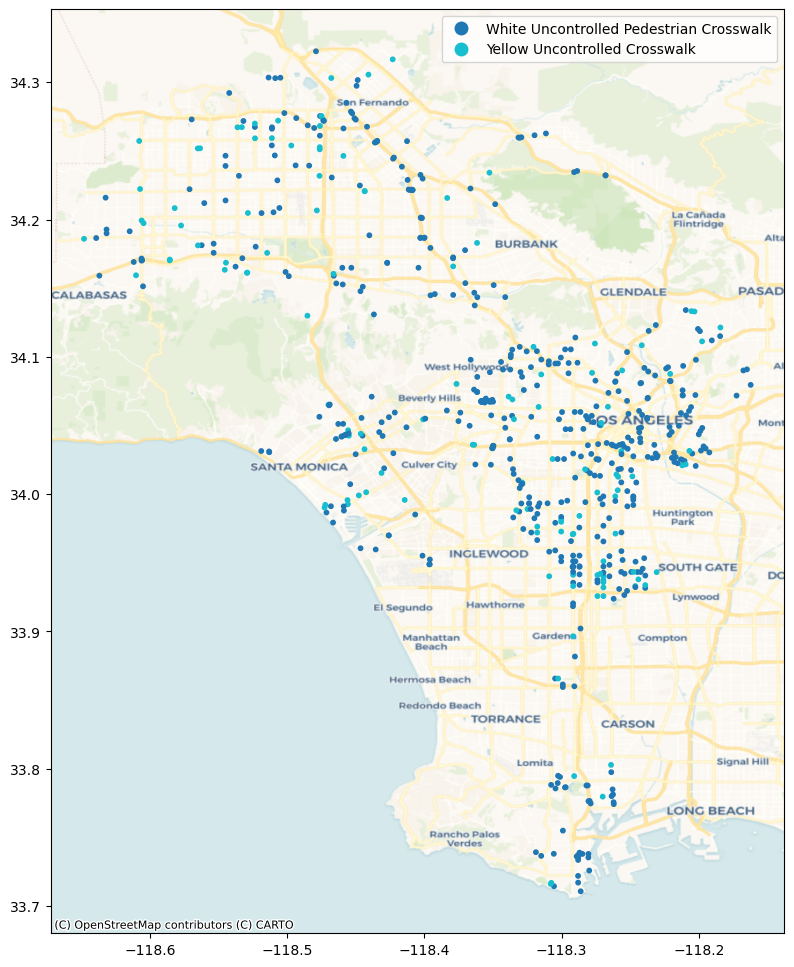

In [47]:
import contextily as ctx

ax = uncontrolled_walks.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'CrossType',   # column that defines the color of the dots
            legend = True,     # add a legend           
            markersize = 10,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
)

ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Voyager)

Output above shows the final map of the uncontrolled crosswalks in LA with a basemap.